In [1]:
from sys import version_info
print(version_info[:3])

(3, 9, 7)


## Import the Libraries

In [17]:
import csv
from math import *
import matplotlib.pyplot as plt
import numpy as np

## Calculate Price of a European Option
This Python script is used for financial computation, specifically to calculate the price of European options, utilizing the Black-Scholes model. It involves two main functions, `normal_cdf` and `bs_eur`. 

The `normal_cdf` function estimates the cumulative density function (CDF) for a normal distribution with given mean, standard deviation, and up to a specified point. This function is essential as the Black-Scholes model assumes the returns of the underlying asset follow a log-normal distribution, and the CDF of the standard normal distribution is used in its formula.

The `bs_eur` function is the primary function, and it uses the Black-Scholes formula to calculate the price of a European option. Inputs to the function include parameters like the current price of the underlying asset, the exercise price of the option, the risk-free interest rate, the time until option expiry, and the asset's volatility. Additionally, the type of the option ('call' or 'put') is provided to the function. Depending on the type of option, the function calculates and returns the price of the call or put option, respectively. It leverages the `normal_cdf` function in these calculations. This script can serve as a valuable tool for financial analysts, investment banks, and anyone interested in pricing European options.

In [ ]:
# Define the cumulative density function of a normal distribution
def normal_cdf(mu, sigma, x):
    """
    Function to calculate the Cumulative Density Function for a Normal Distribution.

    Parameters:
    mu (float): The mean of the normal distribution.
    sigma (float): The standard deviation of the normal distribution.
    x (float): The point up to which the cumulative density is calculated.

    Returns:
    cdf (float): The cumulative density of the normal distribution up to point x.
    """
    cdf = 1/2*(1+erf((x-mu) / (sigma*sqrt(2))))
    return cdf

# Function to calculate the price of a European option using the Black-Scholes formula
def bs_eur(ex_price, int_rate, cur_price, time, vol, option, mu=0):
    """
    Function to calculate the price of a European option using the Black-Scholes model.

    Parameters:
    ex_price (float): The exercise price of the option.
    int_rate (float): The risk-free interest rate.
    cur_price (float): The current price of the underlying asset.
    time (float): The time to expiration of the option (in years).
    vol (float): The volatility of the underlying asset.
    option (str): The type of the option. It can be 'call' or 'put'.
    mu (float, optional): The mean of the log-normal distribution for the underlying asset's returns. Defaults to 0.

    Returns:
    float: The price of the European option.
    """
    # Calculate d1 and d2 parameters
    d1 = (log(cur_price/ex_price) + (int_rate + (vol**2)/2) * time) / (vol * sqrt(time))
    d2 = (log(cur_price/ex_price) + (int_rate - (vol**2)/2) * time) / (vol * sqrt(time))
    
    # Calculate the cumulative density function for d1 and d2
    N_d1 = normal_cdf(0, 1, d1)
    N_d2 = normal_cdf(0, 1, d2)
    
    # Calculate the price of the option based on its type
    if option == 'call':
        call_value = cur_price*N_d1 - ex_price*exp((-int_rate) * time) * N_d2
        return call_value
    elif option == 'put':
        put_value = ex_price*exp((-int_rate) * time) * (1-N_d2) - cur_price*(1-N_d1)
        return put_value


## Root Bisection
This Python function, `root_bisection`, implements the Bisection method for finding a root of a continuous function within a given interval. It takes a function and an interval as inputs, then iteratively halves the interval based on the sign of the function's midpoint value. The process continues until an approximate root is found or if it becomes evident that no root exists within the provided interval.

In [ ]:
def root_bisection(f, a, b):
    """
    Function to find the root of a continuous function in a given interval [a, b] using the bisection method.

    Parameters:
    f (function): The function for which we are trying to approximate a solution f(x) = 0.
    a (float): One end of the interval in which to search for a solution.
    b (float): The other end of the interval in which to search for a solution.

    Returns:
    float or str: It returns the approximate solution within the given interval if it exists or returns an error message.
    """

    # Check if 'a' or 'b' is an approximate root of 'f'
    if abs(f(a)) <= 10**(-9):
        return a
    if abs(f(b)) <= 10**(-9):
        return b
    
    # Check if f(a) and f(b) have opposite signs. If they don't, the function cannot find a root.
    if f(a)*f(b) > 0:
        return 'Approximate root cannot be found'
    
    # Define x_neg and x_pos based on the sign of f(a)
    if f(a) < 0:
        x_neg, x_pos = a,b
    else:
        x_neg, x_pos = b,a
        
    # Enter an infinite loop to iteratively refine the root estimate
    while True:
        # Calculate the midpoint between x_neg and x_pos
        x_mid = (x_neg + x_pos)/2
    
        # If the function value at x_mid is close enough to zero, return x_mid as the root
        if abs(f(x_mid)) <= 10**(-9):
            return x_mid
        # If the function value at x_mid is negative, update x_neg
        elif f(x_mid) < 0:
            x_neg = x_mid
        # If the function value at x_mid is positive, update x_pos
        elif f(x_mid) > 0:
            x_pos = x_mid


## Implied Volatility Estimation
This Python function, `bs_eur_estimate_iv`, estimates the implied volatility of a European option given its observed market value and other parameters. This function uses the Black-Scholes model for pricing the option, and the bisection method to solve for the implied volatility that equates the Black-Scholes calculated option price with the observed market price. The function takes in several parameters including the exercise price, risk-free interest rate, current price of the underlying asset, time to expiration, observed option value, and option type (call or put). It also allows for setting lower and upper bounds for the search of the implied volatility. The implied volatility is a crucial measure in financial markets, providing insights into the market's expectation of the asset's future volatility.

In [30]:
def bs_eur_estimate_iv(ex_price, int_rate, cur_price, time, option_val, option_type, *, lower_vol=0.0001,
                       upper_vol=100):
    """
    Function to estimate the implied volatility for a European option using the Black-Scholes model.

    Parameters:
    ex_price (float): The exercise price of the option.
    int_rate (float): The risk-free interest rate.
    cur_price (float): The current price of the underlying asset.
    time (float): The time to expiration of the option (in years).
    option_val (float): The observed market value of the option.
    option_type (str): The type of the option. It can be 'call' or 'put'.
    lower_vol (float, optional): The lower bound for the search for implied volatility. Defaults to 0.0001.
    upper_vol (float, optional): The upper bound for the search for implied volatility. Defaults to 100.

    Returns:
    float: The estimated implied volatility of the option.
    """

    # Use the bisection root-finding method to find the implied volatility that makes the Black-Scholes
    # calculated value equal to the observed option value.
    return root_bisection(lambda vol: bs_eur(ex_price, int_rate, cur_price, time, vol, option_type) -
                          option_val, lower_vol, upper_vol)


## Implied Volatility Output
This Python script, `apply_iv`, computes the implied volatility of an option and creates a volatility smile plot, given input data in CSV format. It requires data for the exercise price and option value in the input CSV, along with parameters like the current price of the underlying asset, risk-free interest rate, time until the option expires, and the option type. The script first verifies that the exercise price and option value fields exist in the input file and that the implied volatility field doesn't already exist. Then, it computes the implied volatility for each exercise price and option value pair using an auxiliary function `bs_eur_estimate_iv` (not included in the provided code), appends these values to the input data, and writes the enhanced data to an output CSV file. If a filename for a plot is provided, the script also generates a volatility smile plot showing implied volatility as a function of the exercise price and saves it as an image file. The `apply_iv` function is a useful tool for financial analysts, traders, or researchers interested in options pricing and volatility analysis.

In [31]:
def apply_iv(in_filename, out_filename, plot_filename=None,*, ex_price_field, 
             option_val_field, iv_field, cur_price, int_rate, maturity_time, option_type):
    """
    Function to compute implied volatility of an option and create a volatility smile plot.

    Parameters:
    in_filename (str): File name of the input CSV containing exercise prices and option values.
    out_filename (str): File name of the output CSV, which will include computed implied volatilities.
    plot_filename (str, optional): File name of the output plot of the volatility smile. Default is None.
    ex_price_field (str): Field name of the exercise price in the input CSV.
    option_val_field (str): Field name of the option value in the input CSV.
    iv_field (str): Field name for the implied volatility to be added in the output CSV.
    cur_price (float): Current price of the underlying asset.
    int_rate (float): Risk-free interest rate.
    maturity_time (float): Time until the option expires.
    option_type (str): Type of the option ('call' or 'put').

    Returns:
    None: The function writes an output CSV file with added implied volatility field and optionally a volatility smile plot.
    """
    with open(in_filename, 'r') as in_file:
        # Openning and reading the CSV file
        reader_csv = csv.reader(in_file)
        data = [row for row in reader_csv]

        
    header = data[0] # Store the header of the file
    
    
    if not((ex_price_field in header) and (option_val_field in header)):
        # If ex_price_field and option_val_field are not headers of the input file.
        raise ValueError(f"Given {ex_price_field} or {option_val_field} are not the headers of the input file!")
        
        
    if iv_field in header:
        # If iv_field is a header of the input file
        raise ValueError(f"Given {iv_field} should not be a header of the input file!")
    

    ex_price, option_value = [], [] # Create an empty list to store the values of Exercise price and Option value
    for row in data[1:]:
        # Storing Exercise and Option prices
        ex_price.append(float(row[int(header.index(ex_price_field))])),
        option_value.append(float(row[int(header.index(option_val_field))]))

        
    ex_val = zip(ex_price, option_value) # Create pairwise values

    
    imp_vol = [] # Create an empty list to store the values of Implied Volatility
    for ex, val in ex_val:
        # Calculating values of Implied Volatility
        a = round(bs_eur_estimate_iv(ex_price=ex, int_rate=int_rate, cur_price=cur_price, time=maturity_time,
               option_val=val, option_type='call', lower_vol=0.0001, upper_vol=100), 3)
        imp_vol.append(a)


    header.append(iv_field) # Add the CSV field of the Implied Volatility

    
    for i, row in enumerate(data[1:]):
        # Add the Implied Volatility values to the CSV file
        row.append(imp_vol[i])

        
    with open(out_filename, 'w', newline='') as out_file:
        # Write a new file
        writer = csv.writer(out_file)
        writer.writerow(header)
        writer.writerows(data[1:])
    
    
    if plot_filename is not None:
        # Creating the plot
        fig, ax = plt.subplots()
        fig.set_size_inches(8, 6)
        plt.style.use('classic')
        ax.plot(ex_price, imp_vol, color='lime', linewidth=2.25)
        title_font = {'fontsize': 20, 'fontweight': 'bold'}
        ax.set_title('Volatility Smile', fontdict=title_font)
        ax.set_ylabel('Implied Volatility (%)', fontsize=14)
        ax.set_xlabel('Exercise Price', fontsize=14)
        plt.grid(color='red', linestyle=':', linewidth=1)
        fig.savefig(plot_filename, dpi=600)
        

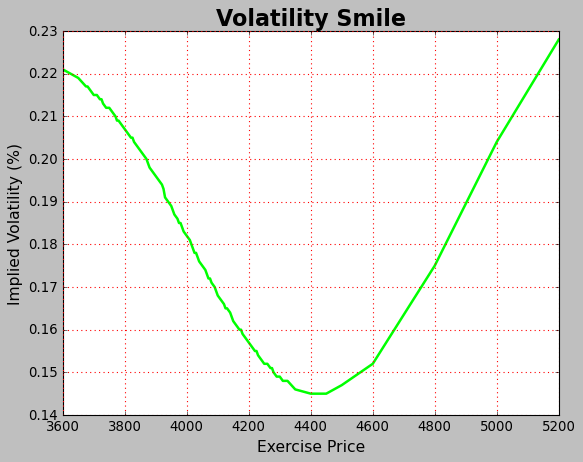

In [32]:
apply_iv(in_filename='AMF2_option_sample.csv', out_filename='ImpVol.csv', plot_filename='ImpSmile.png',
         ex_price_field='Strike', option_val_field='Price', iv_field='Implied Volatility', cur_price=3970.04,
                     int_rate=0.0438, maturity_time=35/252, option_type='call')